# 1. Perkenalan

nama : Iqbal Awis N.

Batch : RMT-19

Objective : Built a model ANN to to predict customer behavior and increase the company services

# 2. Import Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras

# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from feature_engine.outliers import Winsorizer

# Model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input, concatenate, Dropout
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, BatchNormalization, concatenate, Dropout

# Evaluation
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score 

# Saving
import json
import pickle
import joblib


# 3. Data Loading

In [2]:
# Data Loading

df = pd.read_csv('churn.csv')
pd.set_option('display.max_columns', 100)

In [3]:
df

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,22:29:49,4,1184.490000,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,15:44:56,11,338.150000,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,20:31:53,8,235.140000,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,14:28:05,10,56.670000,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,04:16:48,9,153.990000,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,09:32:50,15,199.330000,29455.29,9.0,846.52,Yes,Yes,No,Not Applicable,User Friendly Website,0
37006,90e22286ac0acf04,27,F,City,Gold Membership,2017-01-15,Yes,Without Offers,Desktop,Wi-Fi,02:28:52,15,368.500000,27038.47,8.0,835.98,No,Yes,No,Not Applicable,Reasonable Price,0
37007,9329a6297407334a,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,17:50:38,13,272.130000,39305.35,27.0,714.90,Yes,Yes,Yes,Solved,Poor Customer Service,0
37008,a4403ddda8fcf9f3,38,F,City,Gold Membership,2016-05-25,Yes,Without Offers,Desktop,Wi-Fi,17:07:57,-999,65.070000,46108.73,6.0,744.99,No,Yes,No,Not Applicable,Poor Website,0


# 4. EDA

In [4]:
df.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score
count,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000
mean,37.120697,-41.943502,279.201356,29272.430216,14.659540,623.590885,0.540881
std,15.866834,228.875324,330.017336,19445.963492,9.478756,270.218956,0.498333
min,10.000000,-999.000000,0.000000,800.460000,0.000000,0.000000,0.000000
25%,23.000000,8.000000,60.122500,14177.835000,7.000000,574.220000,0.000000
50%,37.000000,12.000000,161.770000,27554.485000,14.000000,680.400000,1.000000
75%,51.000000,16.000000,356.525000,40858.672500,22.000000,756.990000,1.000000
max,64.000000,26.000000,3235.578521,99914.050000,73.061995,2069.069761,1.000000


`The oldest user which use application about 64 years old`

In [45]:
df['churn_risk_score'].value_counts().to_frame()

,churn_risk_score
1,20018
0,16992


In [5]:
internet_counts = df['internet_option'].value_counts().to_frame()
internet_counts

,internet_option
Wi-Fi,12417
Mobile_Data,12346
Fiber_Optic,12247


`The majority of users visiting the site use Wi-Fi`

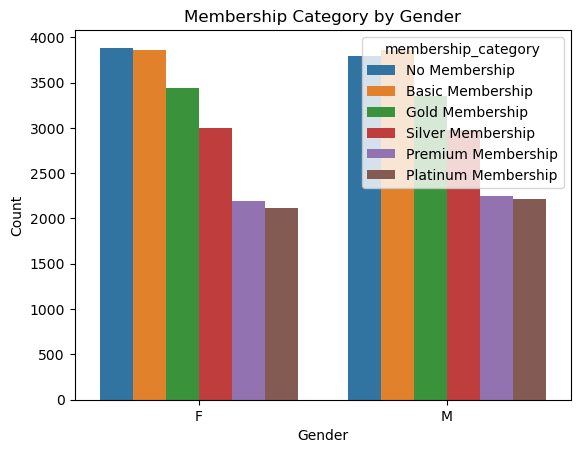

In [6]:
grouped = df.groupby('gender')['membership_category'].value_counts().to_frame().rename(columns={'membership_category': 'count'})
grouped.reset_index(inplace=True)

sns.barplot(data=grouped, x='gender', y='count', hue='membership_category')
plt.title('Membership Category by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

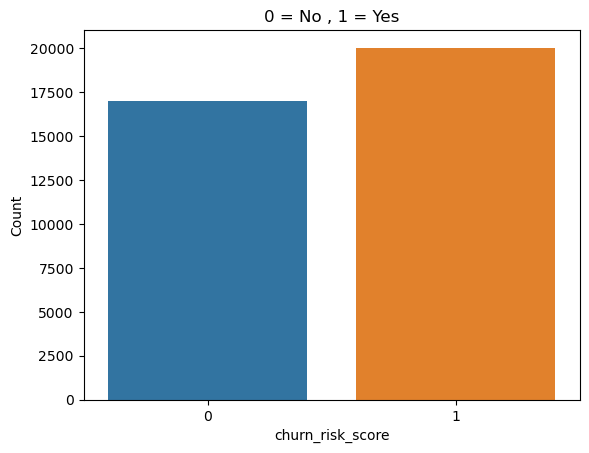

In [7]:

count = df['churn_risk_score'].value_counts()
sns.barplot(x=count.index, y=count.values)
plt.title('0 = No , 1 = Yes')
plt.xlabel('churn_risk_score')
plt.ylabel('Count')
plt.show()

# 5. Feature Engineering

In [8]:
data = df.copy()

In [9]:
data.drop(['user_id' , 'joining_date' , 'last_visit_time'] , axis=1, inplace=True)

## 5.1 Spliting between `X` and `y`

In [10]:
# Split between Train-Set, Val-Set, and Test-Set

X = data.drop('churn_risk_score' , axis=1)
y = data['churn_risk_score']

In [11]:
# Split between Train-set, Val-set, and Test-set

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y , test_size=0.15, random_state=20 , stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=20 , stratify=y_train_val)

print('Train Size : ' , X_train.shape)
print('Val Size : ', X_val.shape)
print('Test Size : ' , X_test.shape)

Train Size :  (26739, 18)
Val Size :  (4719, 18)
Test Size :  (5552, 18)


## 5.2 Handling Missing Value

In [12]:
# Check Missing Values on X_train

X_train.isnull().sum()

age                                0
gender                            44
region_category                 3892
membership_category                0
joined_through_referral         3892
preferred_offer_types            203
medium_of_operation             3908
internet_option                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
dtype: int64

In [13]:
# Check Missing Values on X_val

X_val.isnull().sum()

age                               0
gender                            3
region_category                 737
membership_category               0
joined_through_referral         703
preferred_offer_types            51
medium_of_operation             678
internet_option                   0
days_since_last_login             0
avg_time_spent                    0
avg_transaction_value             0
avg_frequency_login_days          0
points_in_wallet                  0
used_special_discount             0
offer_application_preference      0
past_complaint                    0
complaint_status                  0
feedback                          0
dtype: int64

In [14]:
# Check Missing Value X_test

X_test.isnull().sum()

age                               0
gender                           12
region_category                 802
membership_category               0
joined_through_referral         847
preferred_offer_types            34
medium_of_operation             809
internet_option                   0
days_since_last_login             0
avg_time_spent                    0
avg_transaction_value             0
avg_frequency_login_days          0
points_in_wallet                  0
used_special_discount             0
offer_application_preference      0
past_complaint                    0
complaint_status                  0
feedback                          0
dtype: int64

## 5.3 Get Numerical and Catagorical Columns

In [15]:
# split num_cols and cat_cols

num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns= X_train.select_dtypes(include=['object']).columns.tolist()
print('Num Cols : ' ,num_columns)
print('cat',cat_columns)

Num Cols :  ['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet']
cat ['gender', 'region_category', 'membership_category', 'joined_through_referral', 'preferred_offer_types', 'medium_of_operation', 'internet_option', 'used_special_discount', 'offer_application_preference', 'past_complaint', 'complaint_status', 'feedback']


In [16]:
# split cat_ordinal and cat_onehot

cat_columns_ord = ['membership_category']
cat_columns_ohe = X_train.drop(cat_columns_ord, axis=1).select_dtypes(include=['object']).columns.tolist()

## 5.4 Build Pipeline

In [17]:
# Create A Pipeline

num_pipeline = make_pipeline(SimpleImputer(strategy='median'),
                             Winsorizer(capping_method='iqr' , tail='both', fold=1.5),
                             MinMaxScaler())
ohe_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'),
                             OneHotEncoder())
ord_pipeline = make_pipeline(OrdinalEncoder(categories=[['No Membership', 'Basic Membership', 'Silver Membership', 'Premium Membership','Gold Membership','Platinum Membership']]))

final_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, num_columns),
    ('pipe_ohe_cat', ohe_pipeline, cat_columns_ohe),
    ('pipe_ord_cat', ord_pipeline,cat_columns_ord)
])

In [18]:
# Fit and Transform

X_train = final_pipeline.fit_transform(X_train)
X_test = final_pipeline.transform(X_test)
X_val = final_pipeline.transform(X_val)


# 6. Model Definition

#### Tensorlow Pipeline

In [19]:
train_tf = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(182).repeat(9).prefetch(tf.data.AUTOTUNE)
test_tf = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(182)
val_tf = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(182)

## 6.1 Sequential API

In [20]:
seed = 11
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [21]:
# Model Definition

model_sequential = Sequential()

# Hidden Layer 1
model_sequential.add(Dense(16, 
                           activation='relu',
                           kernel_initializer=tf.keras.initializers.HeNormal(seed),
                           input_shape=(43,))) 
# Hidden Layer 2
model_sequential.add(Dense(8,
                           activation='relu',
                           kernel_initializer=tf.keras.initializers.HeNormal(seed))) 
# Hidden Layer 3
model_sequential.add(Dense(4,
                           activation='relu',
                           kernel_initializer=tf.keras.initializers.HeNormal(seed))) 

# Output Layer
model_sequential.add(Dense(1, 
                           activation='sigmoid',
                           kernel_initializer=tf.keras.initializers.GlorotNormal(seed))) 
# Metric
accuracy = tf.keras.metrics.BinaryAccuracy()
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()

# Compile
model_sequential.compile(loss='binary_crossentropy',
                         optimizer='RMSprop',
                         metrics=[accuracy,precision,recall])
# Summary
model_sequential.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                704       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 881
Trainable params: 881
Non-trainable params: 0
_________________________________________________________________


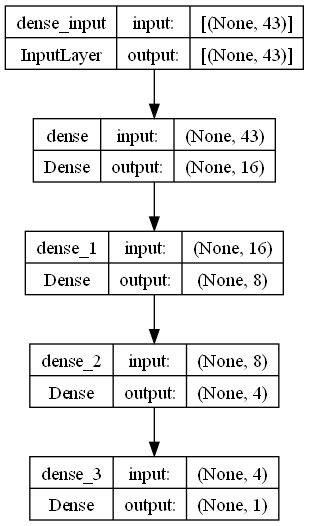

In [22]:
# Plot layer

tf.keras.utils.plot_model(model_sequential, show_shapes=True)


## 6.2 Sequential API Improvement

In [23]:
# Model Definition

model_sequential2 = Sequential()

# Hidden Layer 1
model_sequential2.add(Dense(4, 
                           activation='relu',
                           kernel_initializer=tf.keras.initializers.HeNormal(seed),
                           input_shape=(43,))) # Input Layer
model_sequential2.add(tf.keras.layers.Dropout(rate=0.1))
model_sequential2.add(BatchNormalization())
# Hidden Layer 2
model_sequential2.add(Dense(2,
                           activation='relu',
                           kernel_initializer=tf.keras.initializers.HeNormal(seed))) 
model_sequential2.add(tf.keras.layers.Dropout(rate=0.1))
model_sequential2.add(BatchNormalization())
# Output Layer
model_sequential2.add(Dense(1, 
                           activation='sigmoid',
                           kernel_initializer=tf.keras.initializers.GlorotNormal(seed))) 
# Metric
accuracy = tf.keras.metrics.BinaryAccuracy()
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()

# Compile
model_sequential2.compile(loss='binary_crossentropy',
                         optimizer='Adamax',
                         metrics=[accuracy,precision,recall])
# Summary
model_sequential2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 4)                 176       
                                                                 
 dropout (Dropout)           (None, 4)                 0         
                                                                 
 batch_normalization (BatchN  (None, 4)                16        
 ormalization)                                                   
                                                                 
 dense_5 (Dense)             (None, 2)                 10        
                                                                 
 dropout_1 (Dropout)         (None, 2)                 0         
                                                                 
 batch_normalization_1 (Batc  (None, 2)                8         
 hNormalization)                                      

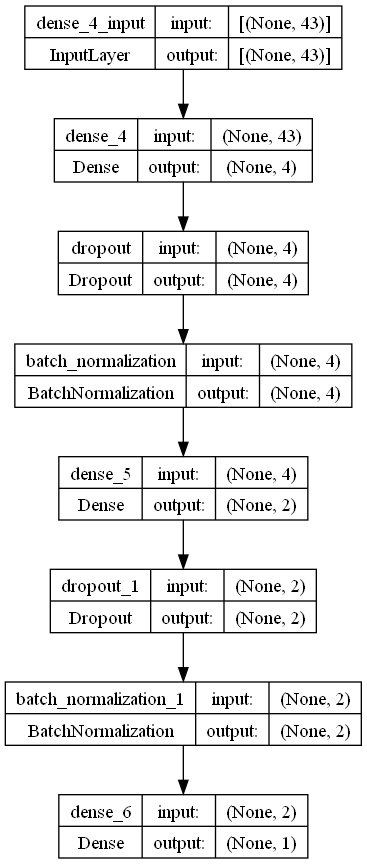

In [24]:
# Plot layer

tf.keras.utils.plot_model(model_sequential2, show_shapes=True)


## 6.3 Functional API

In [25]:
# Create Functional API

input_layer = Input(shape=(43,))

hidden_layer_1 = Dense(16, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed))(input_layer)

hidden_layer_2 = Dense(8, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed))(hidden_layer_1)

hidden_layer_3 = Dense(4, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed))(hidden_layer_2)

# Concat Layer
concat_layer = concatenate([input_layer, hidden_layer_3])

#Output Layer
output_layer = Dense(1, activation='sigmoid', kernel_initializer=tf.keras.initializers.GlorotNormal(seed))(concat_layer)

# Define Model
model_functional = Model(inputs=input_layer, outputs=output_layer)

# Define Metric
accuracy = tf.keras.metrics.BinaryAccuracy()
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()

# Compile
model_functional.compile(loss='binary_crossentropy',
                         optimizer='RMSprop',
                         metrics=[accuracy,precision,recall])

model_functional.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 43)]         0           []                               
                                                                                                  
 dense_7 (Dense)                (None, 16)           704         ['input_1[0][0]']                
                                                                                                  
 dense_8 (Dense)                (None, 8)            136         ['dense_7[0][0]']                
                                                                                                  
 dense_9 (Dense)                (None, 4)            36          ['dense_8[0][0]']                
                                                                                              

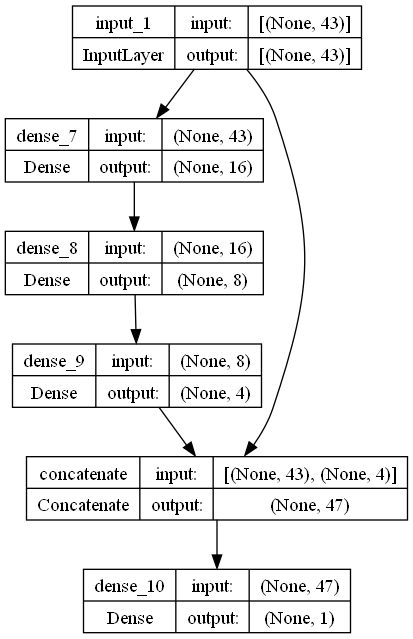

In [26]:
# Plot Layers

tf.keras.utils.plot_model(model_functional, show_shapes=True)

## 6.4 Functional API Improvement

In [27]:
# Create Functional API

input_layer = Input(shape=(43,))

hidden_layer_1 = Dense(4,
                        activation='relu', 
                        kernel_initializer=tf.keras.initializers.HeNormal(seed))(input_layer)
dropout1= Dropout(rate=0.1)(hidden_layer_1)

bn1 = BatchNormalization()(dropout1)

hidden_layer_2 = Dense(2,
                       activation='relu',
                       kernel_initializer=tf.keras.initializers.HeNormal(seed))(bn1)
dropout2 = Dropout(rate=0.1)(hidden_layer_2)
bn2 = BatchNormalization()(dropout2)
# Concat layer
concat_layer=concatenate([input_layer,bn2])

# Output Layer
output_layer = Dense(1,
                     activation='sigmoid',
                     kernel_initializer=tf.keras.initializers.GlorotNormal(seed))(concat_layer)
# Define Model

model_functional2 = Model(inputs=input_layer, outputs=output_layer)


# Define Metric
accuracy = tf.keras.metrics.BinaryAccuracy()
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()

# Compile
model_functional2.compile(loss='binary_crossentropy',
                         optimizer='Adamax',
                         metrics=[accuracy,precision,recall])

model_functional2.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 43)]         0           []                               
                                                                                                  
 dense_11 (Dense)               (None, 4)            176         ['input_2[0][0]']                
                                                                                                  
 dropout_2 (Dropout)            (None, 4)            0           ['dense_11[0][0]']               
                                                                                                  
 batch_normalization_2 (BatchNo  (None, 4)           16          ['dropout_2[0][0]']              
 rmalization)                                                                               

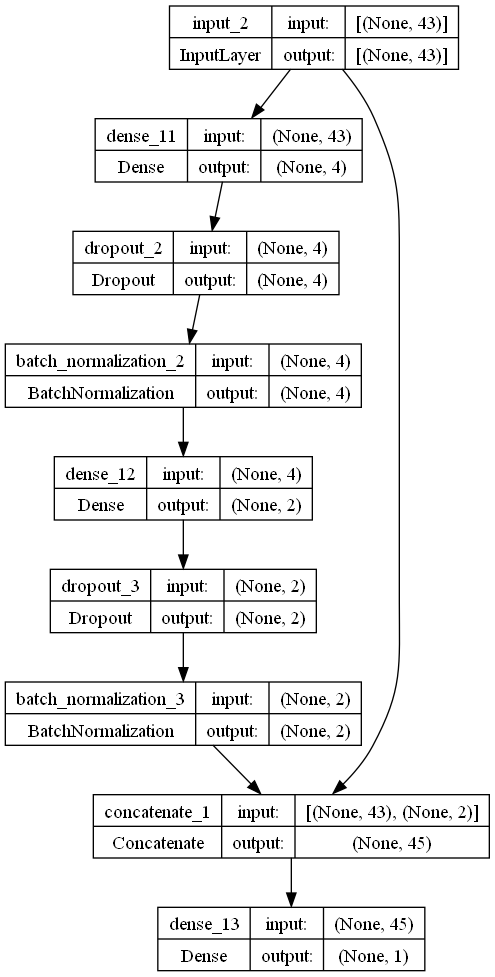

In [28]:
# Plot Layers

tf.keras.utils.plot_model(model_functional2, show_shapes=True)

# 7. Model Training

In [29]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2, restore_best_weights=True)

## 7.1 Sequential API

In [30]:
# Training Model 
history_seq = model_sequential.fit(train_tf,
                                    epochs=200,
                                    validation_data=(val_tf),
                                    callbacks=callback)

Epoch 1/200
1323/1323 [==============================] - 4s 2ms/step - loss: 0.3687 - binary_accuracy: 0.8397 - precision: 0.8670 - recall: 0.8311 - val_loss: 0.3111 - val_binary_accuracy: 0.8656 - val_precision: 0.9266 - val_recall: 0.8162
Epoch 2/200
1323/1323 [==============================] - 3s 2ms/step - loss: 0.3121 - binary_accuracy: 0.8622 - precision: 0.9162 - recall: 0.8202 - val_loss: 0.2904 - val_binary_accuracy: 0.8671 - val_precision: 0.9373 - val_recall: 0.8084
Epoch 3/200
1323/1323 [==============================] - 3s 2ms/step - loss: 0.2865 - binary_accuracy: 0.8629 - precision: 0.9156 - recall: 0.8225 - val_loss: 0.2667 - val_binary_accuracy: 0.8682 - val_precision: 0.9331 - val_recall: 0.8147
Epoch 4/200
1323/1323 [==============================] - 3s 2ms/step - loss: 0.2675 - binary_accuracy: 0.8683 - precision: 0.9082 - recall: 0.8416 - val_loss: 0.2555 - val_binary_accuracy: 0.8714 - val_precision: 0.9245 - val_recall: 0.8299
Epoch 5/200
1323/1323 [=============

## 7.2 Sequential API Improvement

In [31]:
# Training Model 
history_seq2 = model_sequential2.fit(train_tf,
                                    epochs=200,
                                    validation_data=(val_tf),
                                    callbacks=callback)

Epoch 1/200
1323/1323 [==============================] - 6s 3ms/step - loss: 0.4880 - binary_accuracy: 0.7732 - precision_1: 0.8557 - recall_1: 0.6986 - val_loss: 0.3470 - val_binary_accuracy: 0.8635 - val_precision_1: 0.9251 - val_recall_1: 0.8135
Epoch 2/200
1323/1323 [==============================] - 4s 3ms/step - loss: 0.3975 - binary_accuracy: 0.8382 - precision_1: 0.9045 - recall_1: 0.7836 - val_loss: 0.3414 - val_binary_accuracy: 0.8646 - val_precision_1: 0.9330 - val_recall_1: 0.8076
Epoch 3/200
1323/1323 [==============================] - 4s 3ms/step - loss: 0.3915 - binary_accuracy: 0.8442 - precision_1: 0.9125 - recall_1: 0.7874 - val_loss: 0.3423 - val_binary_accuracy: 0.8684 - val_precision_1: 0.9371 - val_recall_1: 0.8111
Epoch 4/200
1323/1323 [==============================] - 4s 3ms/step - loss: 0.3895 - binary_accuracy: 0.8480 - precision_1: 0.9172 - recall_1: 0.7904 - val_loss: 0.3410 - val_binary_accuracy: 0.8756 - val_precision_1: 0.9416 - val_recall_1: 0.8209
Epoc

## 7.3 Functional API

In [32]:
# Training model
history_func = model_functional.fit(train_tf,
                                    epochs=200,
                                    validation_data=(val_tf),
                                    callbacks=callback)

Epoch 1/200
1323/1323 [==============================] - 5s 3ms/step - loss: 0.3657 - binary_accuracy: 0.8322 - precision_2: 0.8653 - recall_2: 0.8170 - val_loss: 0.3038 - val_binary_accuracy: 0.8648 - val_precision_2: 0.9390 - val_recall_2: 0.8021
Epoch 2/200
1323/1323 [==============================] - 3s 2ms/step - loss: 0.3135 - binary_accuracy: 0.8610 - precision_2: 0.9222 - recall_2: 0.8114 - val_loss: 0.2981 - val_binary_accuracy: 0.8627 - val_precision_2: 0.9407 - val_recall_2: 0.7962
Epoch 3/200
1323/1323 [==============================] - 3s 2ms/step - loss: 0.2957 - binary_accuracy: 0.8610 - precision_2: 0.9199 - recall_2: 0.8139 - val_loss: 0.2667 - val_binary_accuracy: 0.8557 - val_precision_2: 0.9231 - val_recall_2: 0.7998
Epoch 4/200
1323/1323 [==============================] - 3s 2ms/step - loss: 0.2586 - binary_accuracy: 0.8721 - precision_2: 0.8946 - recall_2: 0.8654 - val_loss: 0.2510 - val_binary_accuracy: 0.8608 - val_precision_2: 0.9125 - val_recall_2: 0.8213
Epoc

## 7.4 Functional API Improvement

In [33]:
history_func2 = model_functional2.fit(train_tf,
                                    epochs=200,
                                    validation_data=(val_tf),
                                    callbacks=callback)

Epoch 1/200
1323/1323 [==============================] - 10s 4ms/step - loss: 0.5349 - binary_accuracy: 0.7235 - precision_3: 0.7112 - recall_3: 0.8231 - val_loss: 0.3737 - val_binary_accuracy: 0.8417 - val_precision_3: 0.8334 - val_recall_3: 0.8840
Epoch 2/200
1323/1323 [==============================] - 5s 4ms/step - loss: 0.3927 - binary_accuracy: 0.8203 - precision_3: 0.8075 - recall_3: 0.8769 - val_loss: 0.3498 - val_binary_accuracy: 0.8445 - val_precision_3: 0.8382 - val_recall_3: 0.8828
Epoch 3/200
1323/1323 [==============================] - 5s 4ms/step - loss: 0.3669 - binary_accuracy: 0.8261 - precision_3: 0.8203 - recall_3: 0.8688 - val_loss: 0.3401 - val_binary_accuracy: 0.8462 - val_precision_3: 0.8414 - val_recall_3: 0.8817
Epoch 4/200
1323/1323 [==============================] - 5s 4ms/step - loss: 0.3547 - binary_accuracy: 0.8275 - precision_3: 0.8251 - recall_3: 0.8643 - val_loss: 0.3311 - val_binary_accuracy: 0.8466 - val_precision_3: 0.8467 - val_recall_3: 0.8746
Epo

# 8. Model Evaluation

## 8.1 Sequential API

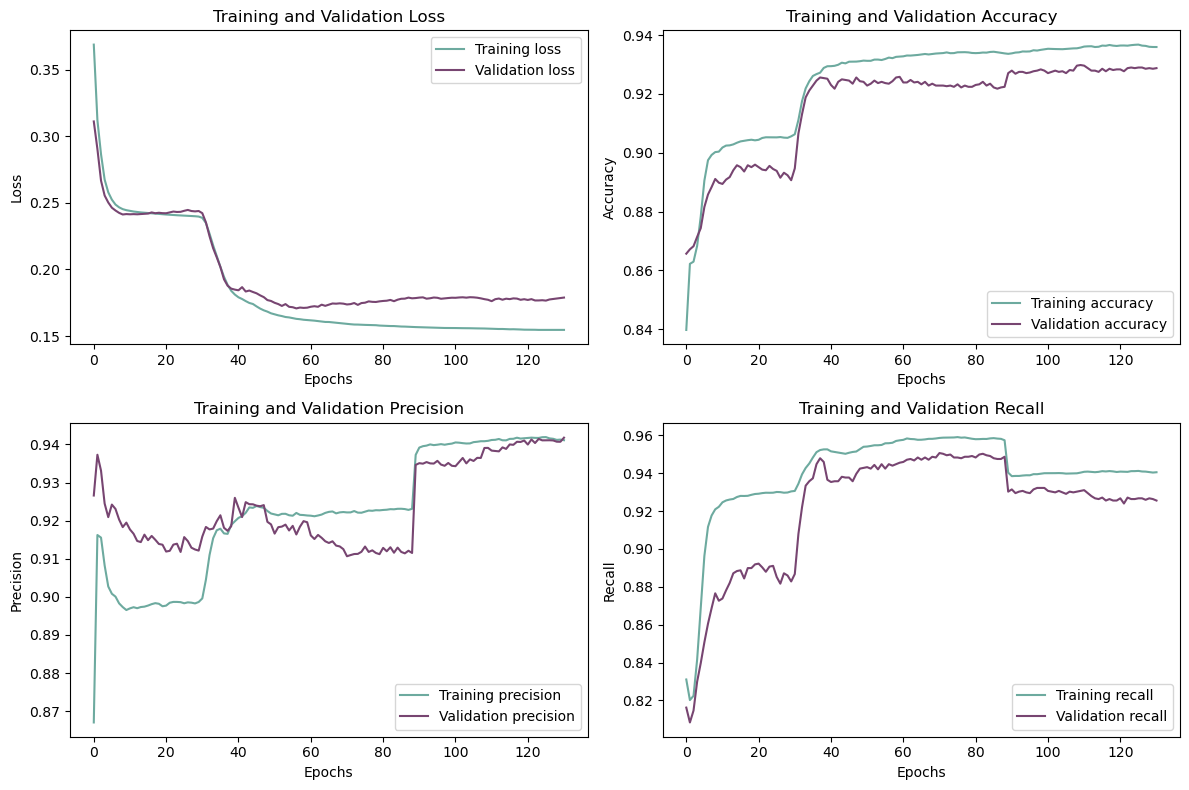

In [34]:
seq_mod_df = pd.DataFrame(history_seq.history)

# Create a figure with four subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot Training and Validation Loss
axs[0, 0].plot(seq_mod_df['loss'], "#6daa9f", label='Training loss')
axs[0, 0].plot(seq_mod_df['val_loss'], "#774571", label='Validation loss')
axs[0, 0].set_title('Training and Validation Loss')
axs[0, 0].set_xlabel('Epochs')
axs[0, 0].set_ylabel('Loss')
axs[0, 0].legend(loc="best")

# Plot Training and Validation Accuracy
axs[0, 1].plot(seq_mod_df['binary_accuracy'], "#6daa9f", label='Training accuracy')
axs[0, 1].plot(seq_mod_df['val_binary_accuracy'], "#774571", label='Validation accuracy')
axs[0, 1].set_title('Training and Validation Accuracy')
axs[0, 1].set_xlabel('Epochs')
axs[0, 1].set_ylabel('Accuracy')
axs[0, 1].legend()

# Plot Training and Validation Precision
axs[1, 0].plot(seq_mod_df['precision'], "#6daa9f", label='Training precision')
axs[1, 0].plot(seq_mod_df['val_precision'], "#774571", label='Validation precision')
axs[1, 0].set_title('Training and Validation Precision')
axs[1, 0].set_xlabel('Epochs')
axs[1, 0].set_ylabel('Precision')
axs[1, 0].legend()

# Plot Training and Validation Recall
axs[1, 1].plot(seq_mod_df['recall'], "#6daa9f", label='Training recall')
axs[1, 1].plot(seq_mod_df['val_recall'], "#774571", label='Validation recall')
axs[1, 1].set_title('Training and Validation Recall')
axs[1, 1].set_xlabel('Epochs')
axs[1, 1].set_ylabel('Recall')
axs[1, 1].legend()

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()

174/174 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      2549
           1       0.94      0.93      0.93      3003

    accuracy                           0.93      5552
   macro avg       0.93      0.93      0.93      5552
weighted avg       0.93      0.93      0.93      5552



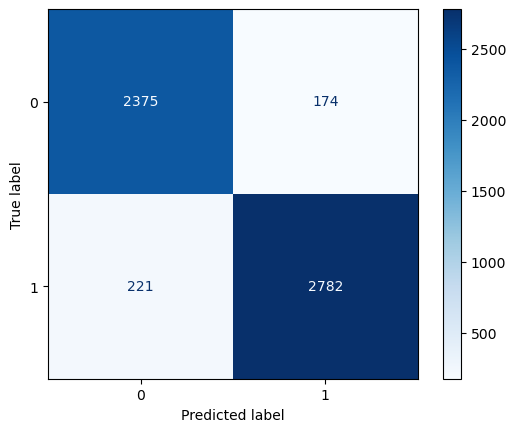

In [35]:
# Evaluasi model  of test set

y_pred_seq1 = model_sequential.predict(X_test)
y_pred_seq1 = np.where(y_pred_seq1 >=0.5, 1, 0)

print(classification_report(y_test, y_pred_seq1))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_seq1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,)
disp.plot(cmap='Blues')
plt.show()

## 8.2 Sequential API Improvement

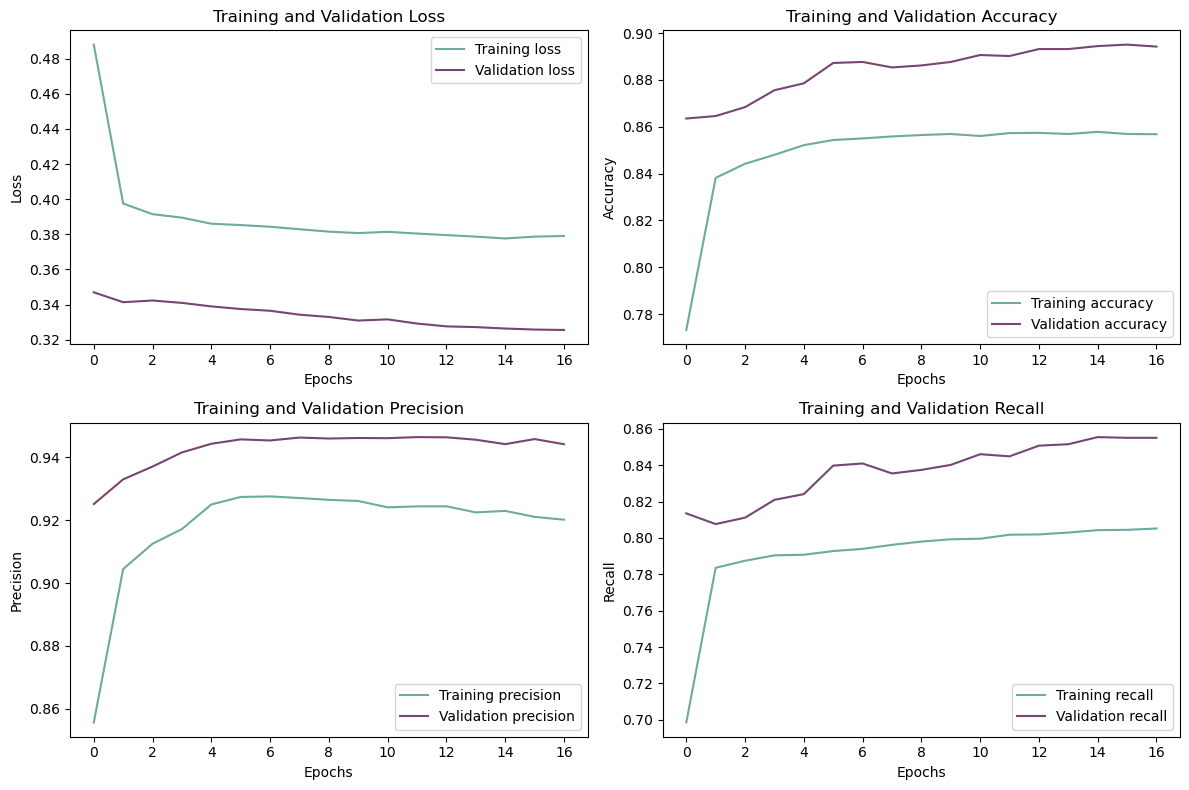

In [36]:
seq_mod2_df = pd.DataFrame(history_seq2.history)

# Create a figure with four subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot Training and Validation Loss
axs[0, 0].plot(seq_mod2_df['loss'], "#6daa9f", label='Training loss')
axs[0, 0].plot(seq_mod2_df['val_loss'], "#774571", label='Validation loss')
axs[0, 0].set_title('Training and Validation Loss')
axs[0, 0].set_xlabel('Epochs')
axs[0, 0].set_ylabel('Loss')
axs[0, 0].legend(loc="best")

# Plot Training and Validation Accuracy
axs[0, 1].plot(seq_mod2_df['binary_accuracy'], "#6daa9f", label='Training accuracy')
axs[0, 1].plot(seq_mod2_df['val_binary_accuracy'], "#774571", label='Validation accuracy')
axs[0, 1].set_title('Training and Validation Accuracy')
axs[0, 1].set_xlabel('Epochs')
axs[0, 1].set_ylabel('Accuracy')
axs[0, 1].legend()

# Plot Training and Validation Precision
axs[1, 0].plot(seq_mod2_df['precision_1'], "#6daa9f", label='Training precision')
axs[1, 0].plot(seq_mod2_df['val_precision_1'], "#774571", label='Validation precision')
axs[1, 0].set_title('Training and Validation Precision')
axs[1, 0].set_xlabel('Epochs')
axs[1, 0].set_ylabel('Precision')
axs[1, 0].legend()

# Plot Training and Validation Recall
axs[1, 1].plot(seq_mod2_df['recall_1'], "#6daa9f", label='Training recall')
axs[1, 1].plot(seq_mod2_df['val_recall_1'], "#774571", label='Validation recall')
axs[1, 1].set_title('Training and Validation Recall')
axs[1, 1].set_xlabel('Epochs')
axs[1, 1].set_ylabel('Recall')
axs[1, 1].legend()

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()

174/174 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      2549
           1       0.94      0.85      0.90      3003

    accuracy                           0.89      5552
   macro avg       0.89      0.90      0.89      5552
weighted avg       0.90      0.89      0.89      5552



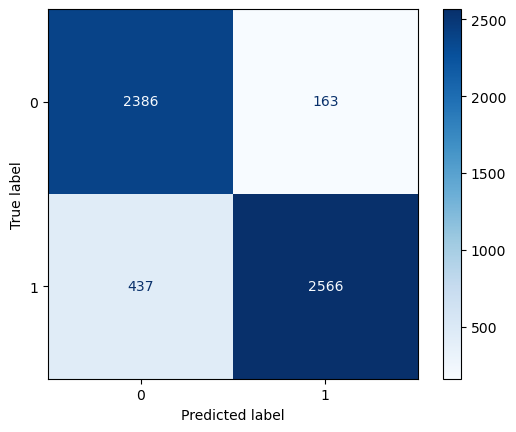

In [37]:
# Evaluasi model  of test set

y_pred_seq2 = model_sequential2.predict(X_test)
y_pred_seq2 = np.where(y_pred_seq2 >=0.5, 1, 0)

print(classification_report(y_test, y_pred_seq2))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_seq2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,)
disp.plot(cmap='Blues')
plt.show()

## 8.3 Funtional API

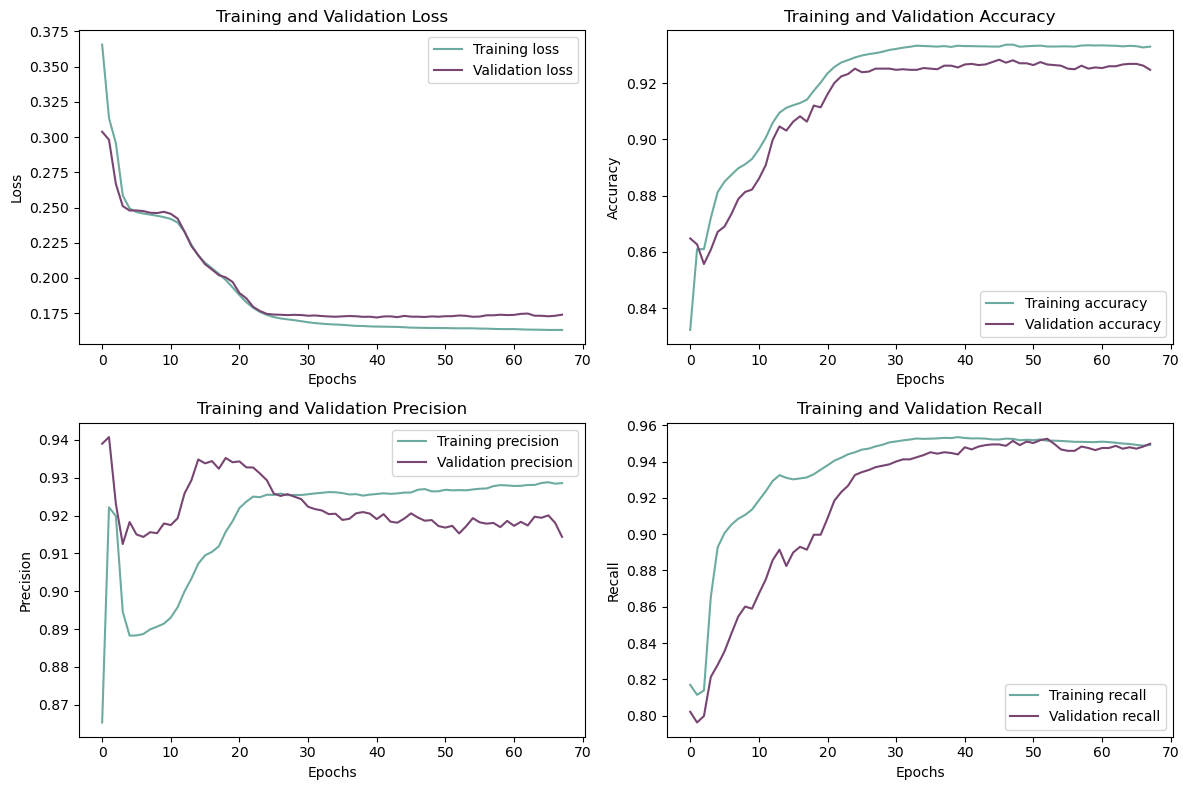

In [38]:
func_api_df = pd.DataFrame(history_func.history)

# Create a figure with four subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot Training and Validation Loss
axs[0, 0].plot(func_api_df['loss'], "#6daa9f", label='Training loss')
axs[0, 0].plot(func_api_df['val_loss'], "#774571", label='Validation loss')
axs[0, 0].set_title('Training and Validation Loss')
axs[0, 0].set_xlabel('Epochs')
axs[0, 0].set_ylabel('Loss')
axs[0, 0].legend(loc="best")

# Plot Training and Validation Accuracy
axs[0, 1].plot(func_api_df['binary_accuracy'], "#6daa9f", label='Training accuracy')
axs[0, 1].plot(func_api_df['val_binary_accuracy'], "#774571", label='Validation accuracy')
axs[0, 1].set_title('Training and Validation Accuracy')
axs[0, 1].set_xlabel('Epochs')
axs[0, 1].set_ylabel('Accuracy')
axs[0, 1].legend()

# Plot Training and Validation Precision
axs[1, 0].plot(func_api_df['precision_2'], "#6daa9f", label='Training precision')
axs[1, 0].plot(func_api_df['val_precision_2'], "#774571", label='Validation precision')
axs[1, 0].set_title('Training and Validation Precision')
axs[1, 0].set_xlabel('Epochs')
axs[1, 0].set_ylabel('Precision')
axs[1, 0].legend()

# Plot Training and Validation Recall
axs[1, 1].plot(func_api_df['recall_2'], "#6daa9f", label='Training recall')
axs[1, 1].plot(func_api_df['val_recall_2'], "#774571", label='Validation recall')
axs[1, 1].set_title('Training and Validation Recall')
axs[1, 1].set_xlabel('Epochs')
axs[1, 1].set_ylabel('Recall')
axs[1, 1].legend()

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()

174/174 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.93      0.90      0.92      2549
           1       0.92      0.94      0.93      3003

    accuracy                           0.92      5552
   macro avg       0.92      0.92      0.92      5552
weighted avg       0.92      0.92      0.92      5552



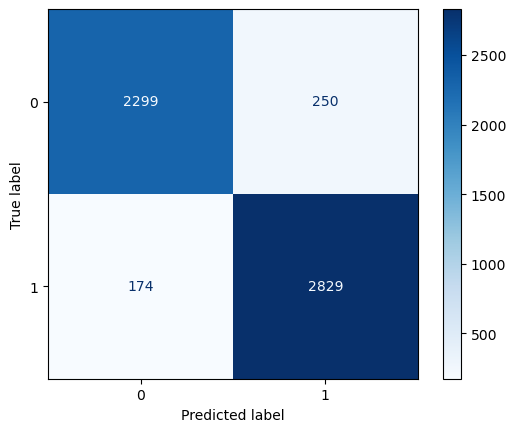

In [39]:
# Evaluasi model  of test set

y_pred_func = model_functional.predict(X_test)
y_pred_func = np.where(y_pred_func >=0.5, 1, 0)

print(classification_report(y_test, y_pred_func))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_func)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,)
disp.plot(cmap='Blues')
plt.show()

## 8.4 Functional API Improvement

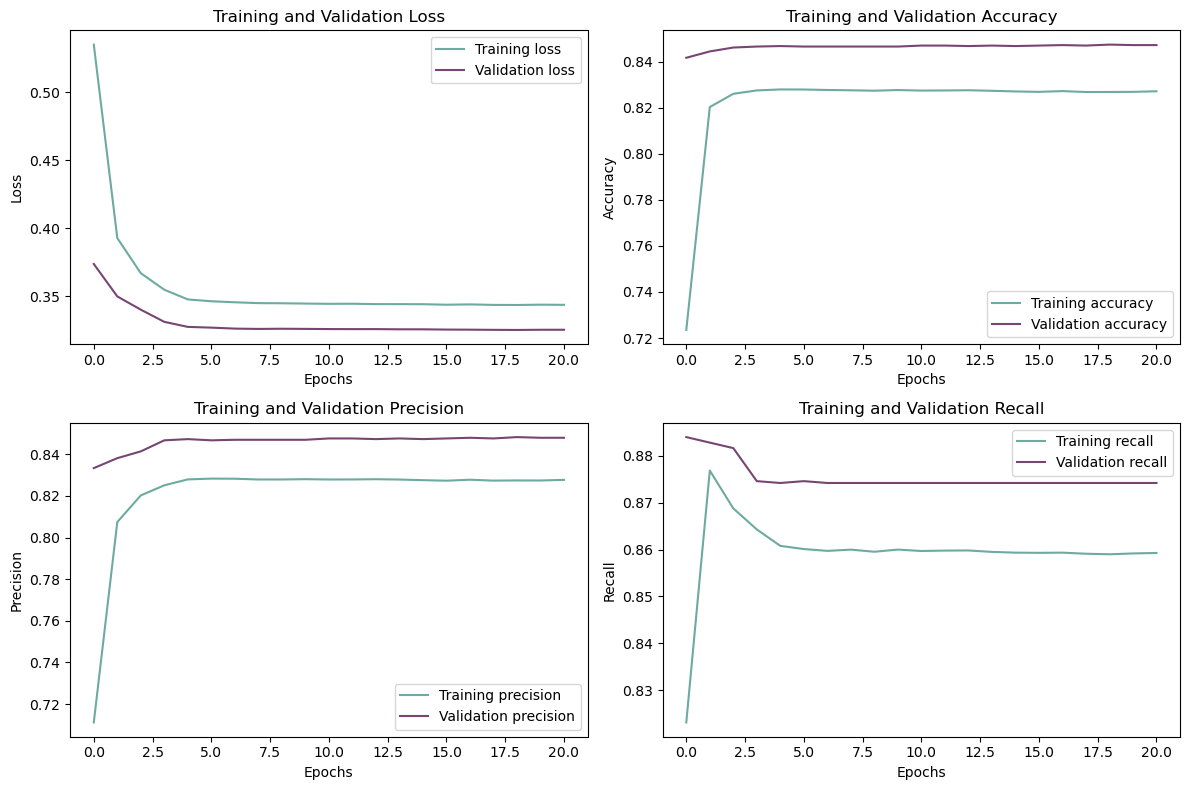

In [40]:
func_api2_df = pd.DataFrame(history_func2.history)

# Create a figure with four subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot Training and Validation Loss
axs[0, 0].plot(func_api2_df['loss'], "#6daa9f", label='Training loss')
axs[0, 0].plot(func_api2_df['val_loss'], "#774571", label='Validation loss')
axs[0, 0].set_title('Training and Validation Loss')
axs[0, 0].set_xlabel('Epochs')
axs[0, 0].set_ylabel('Loss')
axs[0, 0].legend(loc="best")

# Plot Training and Validation Accuracy
axs[0, 1].plot(func_api2_df['binary_accuracy'], "#6daa9f", label='Training accuracy')
axs[0, 1].plot(func_api2_df['val_binary_accuracy'], "#774571", label='Validation accuracy')
axs[0, 1].set_title('Training and Validation Accuracy')
axs[0, 1].set_xlabel('Epochs')
axs[0, 1].set_ylabel('Accuracy')
axs[0, 1].legend()

# Plot Training and Validation Precision
axs[1, 0].plot(func_api2_df['precision_3'], "#6daa9f", label='Training precision')
axs[1, 0].plot(func_api2_df['val_precision_3'], "#774571", label='Validation precision')
axs[1, 0].set_title('Training and Validation Precision')
axs[1, 0].set_xlabel('Epochs')
axs[1, 0].set_ylabel('Precision')
axs[1, 0].legend()

# Plot Training and Validation Recall
axs[1, 1].plot(func_api2_df['recall_3'], "#6daa9f", label='Training recall')
axs[1, 1].plot(func_api2_df['val_recall_3'], "#774571", label='Validation recall')
axs[1, 1].set_title('Training and Validation Recall')
axs[1, 1].set_xlabel('Epochs')
axs[1, 1].set_ylabel('Recall')
axs[1, 1].legend()

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()

174/174 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      2549
           1       0.83      0.87      0.85      3003

    accuracy                           0.84      5552
   macro avg       0.84      0.83      0.83      5552
weighted avg       0.84      0.84      0.84      5552



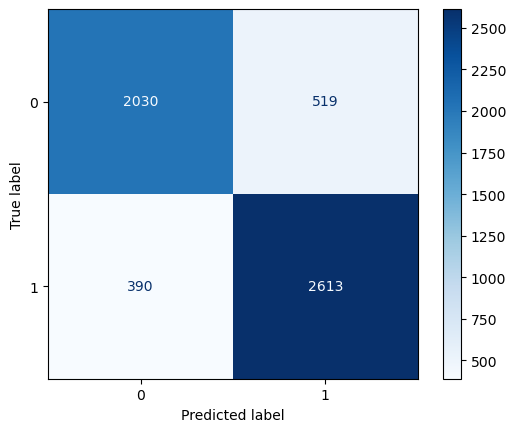

In [41]:
# Evaluasi model  of test set

y_pred_func2 = model_functional2.predict(X_test)
y_pred_func2 = np.where(y_pred_func2 >=0.5, 1, 0)

print(classification_report(y_test, y_pred_func2))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_func2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,)
disp.plot(cmap='Blues')
plt.show()

# 9. Model Saving

In [42]:
# Saving Model

with open ('pipeline.pkl', 'wb') as file_1:
    pickle.dump(final_pipeline, file_1)

In [43]:
model_functional2.save('model.h5')

# 11. Conclusion

* EDA :

The Oldest customer is 64 years old.

Average transaction is 29272

The majority of users visiting the site use Wi-Fi

The majority customers have a risk churn



* Model :

Model in this case used the Improved model because performance is better than default model

Functional API Improved have a goodfitting



* Overall Analysis :

Majority customer has No Membership it's a point to company to increace they service to get membership from customers

Rate of churn risk is too high, maybe the company have to good event. Such as create event or discount to new membership